# Nikita Kiran More(Batch may 2024)

# XGBM & LGBM

# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data1= pd.read_csv('Titanic_test.csv')

In [7]:
data2= pd.read_csv('Titanic_train.csv')

In [8]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
data1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

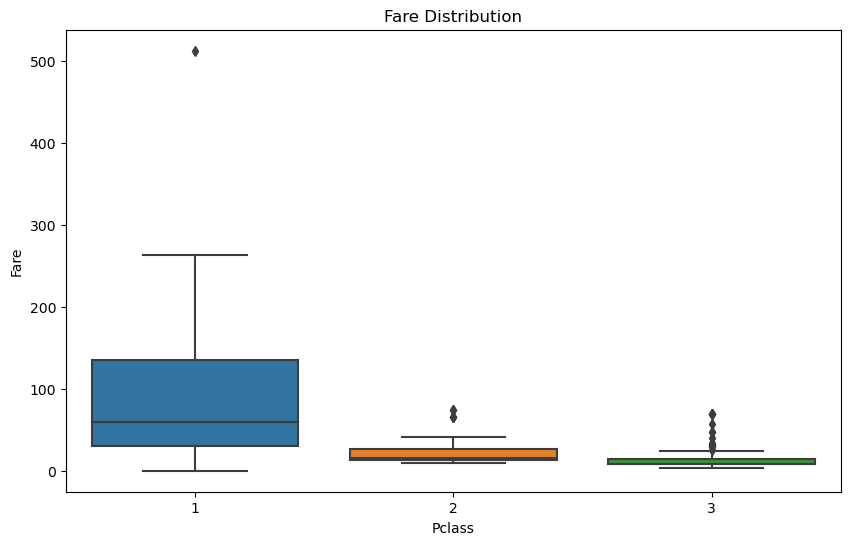

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=data1)
plt.title('Fare Distribution')
plt.show()

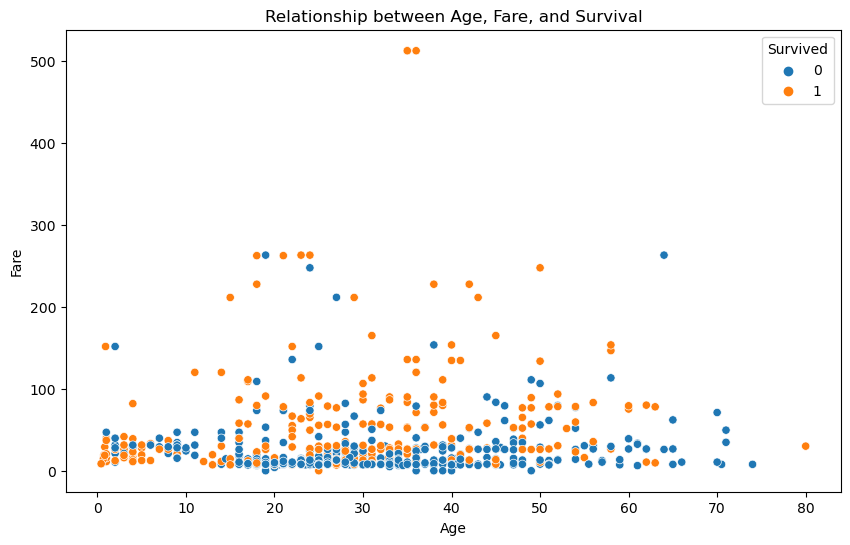

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data2)
plt.title('Relationship between Age, Fare, and Survival')
plt.show()

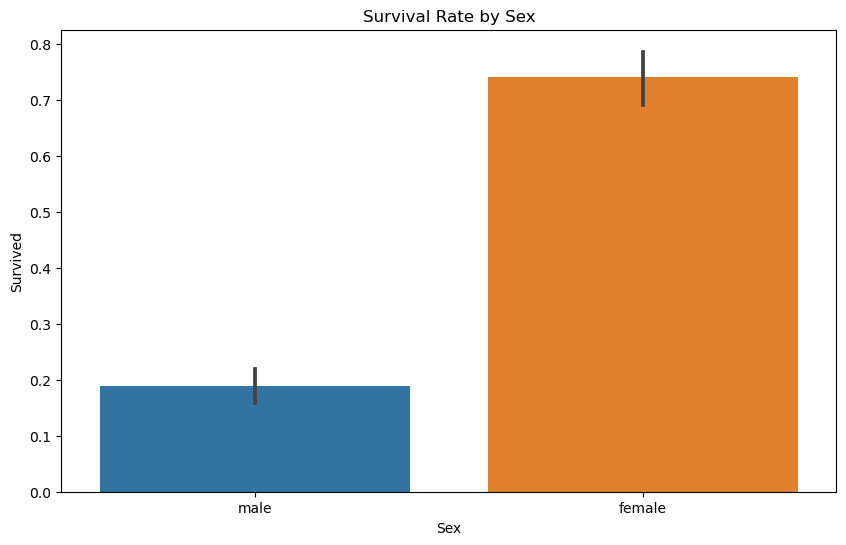

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data2)
plt.title('Survival Rate by Sex')
plt.show()
     

# Task 2: Data Preprocessing

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [27]:
imputer = SimpleImputer(strategy='mean')
data2[['Age', 'Fare']] = imputer.fit_transform(data2[['Age', 'Fare']])
data1[['Age', 'Fare']] = imputer.transform(data1[['Age', 'Fare']])   

In [29]:
data1[['Age', 'Fare']]

,Age,Fare
0,34.500000,7.8292
1,47.000000,7.0000
2,62.000000,9.6875
3,27.000000,8.6625
4,22.000000,12.2875
...,...,...
413,29.699118,8.0500
414,39.000000,108.9000
415,38.500000,7.2500
416,29.699118,8.0500


In [30]:
data2[['Age', 'Fare']]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [33]:
le = LabelEncoder()
data2['Sex'] = le.fit_transform(data2['Sex'])
data1['Sex'] = le.transform(data1['Sex'])

In [34]:
le

LabelEncoder()

In [35]:
data1['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [36]:
data2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [40]:
ohe = OneHotEncoder(sparse_output=False)
data2 = pd.concat([data2, pd.DataFrame(ohe.fit_transform(data2[['Embarked']]))], axis=1)
data1 = pd.concat([data1, pd.DataFrame(ohe.transform(data1[['Embarked']]))], axis=1)

In [41]:
ohe

OneHotEncoder(sparse_output=False)

In [42]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,0.0


In [43]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,0,1,2,3
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,1308,3,"Ware, Mr. Frederick",1,29.699118,0,0,359309,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
data2.drop(['Embarked'], axis=1, inplace=True)
data1.drop(['Embarked'], axis=1, inplace=True)

In [46]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1.0,0.0,0.0,0.0


In [47]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,2,0,1,2,3
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,1308,3,"Ware, Mr. Frederick",1,29.699118,0,0,359309,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Task 3: Building Predictive Models

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [51]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
     

In [54]:
X = data2.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Dropping columns not needed for modeling
y = data2['Survived']

In [55]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0
1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0
3,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0
4,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0
887,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0
888,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0


In [57]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
331,1,1,45.500000,0,0,28.5000,0.0,0.0,1.0,0.0
733,2,1,23.000000,0,0,13.0000,0.0,0.0,1.0,0.0
382,3,1,32.000000,0,0,7.9250,0.0,0.0,1.0,0.0
704,3,1,26.000000,1,0,7.8542,0.0,0.0,1.0,0.0
813,3,0,6.000000,4,2,31.2750,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,0.0,0.0,1.0,0.0
270,1,1,29.699118,0,0,31.0000,0.0,0.0,1.0,0.0
860,3,1,41.000000,2,0,14.1083,0.0,0.0,1.0,0.0
435,1,0,14.000000,1,2,120.0000,0.0,0.0,1.0,0.0


In [60]:
X_valid    

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
709,3,1,29.699118,1,1,15.2458,1.0,0.0,0.0,0.0
439,2,1,31.000000,0,0,10.5000,0.0,0.0,1.0,0.0
840,3,1,20.000000,0,0,7.9250,0.0,0.0,1.0,0.0
720,2,0,6.000000,0,1,33.0000,0.0,0.0,1.0,0.0
39,3,0,14.000000,1,0,11.2417,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250,0.0,0.0,1.0,0.0
773,3,1,29.699118,0,0,7.2250,1.0,0.0,0.0,0.0
25,3,0,38.000000,1,5,31.3875,0.0,0.0,1.0,0.0
84,2,0,17.000000,0,0,10.5000,0.0,0.0,1.0,0.0


In [61]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [62]:
y_valid

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [63]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_valid.shape}, {y_valid.shape}")

Training set: (712, 10), (712,)
Validation set: (179, 10), (179,)


# Task 3: Building Predictive Models using LightGBM and XGBoost



In [65]:
pip install lightgbm xgboost


                                              0.0/1.4 MB ? eta -:--:--
     -------------                            0.5/1.4 MB 10.5 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 13.3 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 13.3 MB/s eta 0:00:01
     -----------------------------            1.1/1.4 MB 6.2 MB/s eta 0:00:01
     --------------------------------         1.2/1.4 MB 6.3 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 5.4 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
                                              0.0/124.9 MB ? eta -:--:--
                                              0.4/124.9 MB 8.7 MB/s eta 0:00:15
                                             0.9/124.9 MB 10.8 MB/s eta 0:00:12
                                              1.3/124.9 MB 9.2 MB/s eta 0:00:14
                                             1.8/124.9 MB 10.1 MB/

In [66]:
import lightgbm as lgb

In [67]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)     

In [68]:
train_data

In [69]:
valid_data

In [70]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Define metric for early stopping
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

In [71]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [72]:
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],  # Monitoring validation set
    valid_names=['valid'],  # Name of validation dataset
    num_boost_round=1000,  # Maximum number of boosting rounds
)


In [73]:
y_pred_lgb = (lgb_model.predict(X_valid, num_iteration=lgb_model.best_iteration) > 0.5).astype(int)

In [74]:
y_pred_lgb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [75]:
import xgboost as xgb

In [76]:
xgb_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 100,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

In [79]:
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-logloss:0.63746	validation_1-logloss:0.65594
[1]	validation_0-logloss:0.61510	validation_1-logloss:0.63388
[2]	validation_0-logloss:0.59487	validation_1-logloss:0.61409
[3]	validation_0-logloss:0.57648	validation_1-logloss:0.59613
[4]	validation_0-logloss:0.55970	validation_1-logloss:0.57972
[5]	validation_0-logloss:0.54472	validation_1-logloss:0.56560
[6]	validation_0-logloss:0.53099	validation_1-logloss:0.55263
[7]	validation_0-logloss:0.51825	validation_1-logloss:0.54121
[8]	validation_0-logloss:0.50627	validation_1-logloss:0.53049
[9]	validation_0-logloss:0.49539	validation_1-logloss:0.52186
[10]	validation_0-logloss:0.48511	validation_1-logloss:0.51254
[11]	validation_0-logloss:0.47524	validation_1-logloss:0.50354
[12]	validation_0-logloss:0.46633	validation_1-logloss:0.49630
[13]	validation_0-logloss:0.45788	validation_1-logloss:0.48962
[14]	validation_0-logloss:0.45005	validation_1-logloss:0.48343
[15]	validation_0-logloss:0.44271	validation_1-logloss:0.47771
[1

C:\Users\91940\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:23:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[52]	validation_0-logloss:0.31453	validation_1-logloss:0.41918
[53]	validation_0-logloss:0.31242	validation_1-logloss:0.41843
[54]	validation_0-logloss:0.31102	validation_1-logloss:0.41855
[55]	validation_0-logloss:0.30952	validation_1-logloss:0.41809
[56]	validation_0-logloss:0.30786	validation_1-logloss:0.41714
[57]	validation_0-logloss:0.30601	validation_1-logloss:0.41759
[58]	validation_0-logloss:0.30449	validation_1-logloss:0.41853
[59]	validation_0-logloss:0.30322	validation_1-logloss:0.41929
[60]	validation_0-logloss:0.30189	validation_1-logloss:0.41891
[61]	validation_0-logloss:0.30025	validation_1-logloss:0.41883
[62]	validation_0-logloss:0.29916	validation_1-logloss:0.41917
[63]	validation_0-logloss:0.29799	validation_1-logloss:0.41909
[64]	validation_0-logloss:0.29669	validation_1-logloss:0.41976
[65]	validation_0-logloss:0.29557	validation_1-logloss:0.42020
[66]	validation_0-logloss:0.29453	validation_1-logloss:0.42093
[67]	validation_0-logloss:0.29330	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred_xgb = xgb_model.predict(X_valid)

In [81]:
y_pred_xgb


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [83]:
# Function definition
def print_model_performance(y_true, y_pred, model_name="Model"):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


y_valid = [0, 1, 1, 0, 1]  # Example true labels
y_pred_lgb = [0, 1, 1, 1, 0]  # Example predictions for LightGBM
y_pred_xgb = [0, 0, 1, 0, 1]  # Example predictions for XGBoost

# Call the function with your actual predictions
print_model_performance(y_valid, y_pred_lgb, model_name="LightGBM")
print_model_performance(y_valid, y_pred_xgb, model_name="XGBoost")
     

LightGBM Performance:
Accuracy: 0.6000
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667

Confusion Matrix:
[[1 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

XGBoost Performance:
Accuracy: 0.8000
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000

Confusion Matrix:
[[2 0]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# Task 4: Comparative Analysis



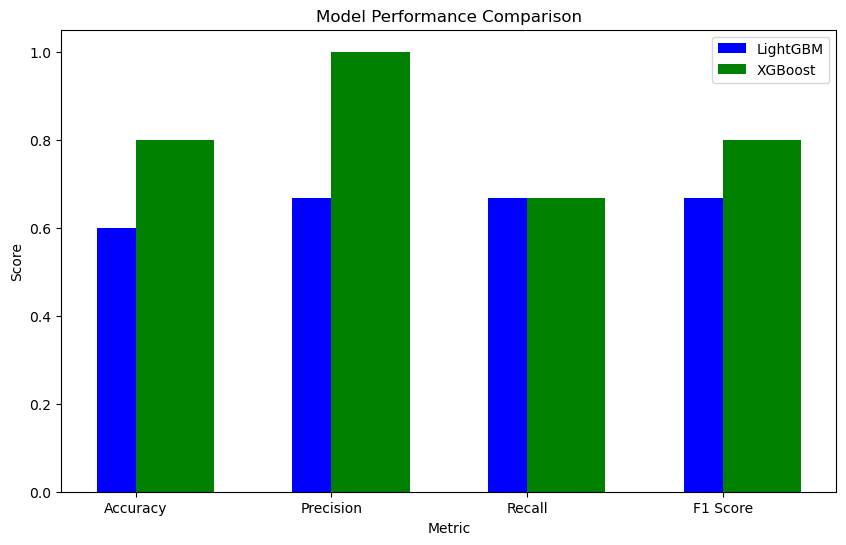

In [84]:

import matplotlib.pyplot as plt

# Plot model performance comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_score(y_valid, y_pred_lgb), precision_score(y_valid, y_pred_lgb), recall_score(y_valid, y_pred_lgb), f1_score(y_valid, y_pred_lgb)]
xgb_scores = [accuracy_score(y_valid, y_pred_xgb), precision_score(y_valid, y_pred_xgb), recall_score(y_valid, y_pred_xgb), f1_score(y_valid, y_pred_xgb)]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', color='b', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', color='g', align='edge')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.show()

     
